In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:50<00:00, 23.3MB/s]
100% 1.06G/1.06G [00:50<00:00, 22.8MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout,concatenate,AveragePooling2D

In [6]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


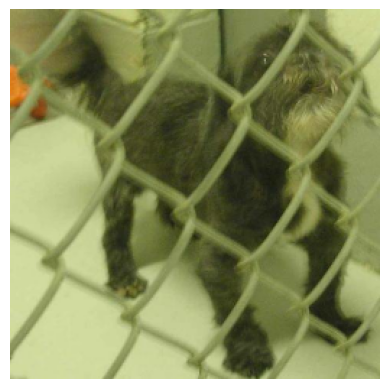

In [7]:
import matplotlib.pyplot as plt

# Get one batch of images from the train dataset
for images, labels in train_ds.take(1):
    # Plot the first image in the batch
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.axis("off")
    plt.show()

In [8]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [9]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load the VGG16 model pre-trained on ImageNet, excluding the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the base model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


58889256/58889256 [==============================] - 3s 0us/step


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 14977857 (57.14 MB)
Trainable params: 263169 (1.00 MB)
Non-trainable params: 14714688 (56.13 MB)
___________

In [11]:
history = model.fit(train_ds,epochs=3,validation_data=validation_ds)

Epoch 1/3
625/625 [==============================] - 152s 224ms/step - loss: 0.2842 - accuracy: 0.8738 - val_loss: 0.1867 - val_accuracy: 0.9266
Epoch 2/3
625/625 [==============================] - 146s 234ms/step - loss: 0.2073 - accuracy: 0.9122 - val_loss: 0.1720 - val_accuracy: 0.9300
Epoch 3/3
625/625 [==============================] - 148s 237ms/step - loss: 0.1890 - accuracy: 0.9228 - val_loss: 0.1637 - val_accuracy: 0.9328


In [12]:
import cv2

In [13]:
test_img = cv2.imread('/content/train/cats/cat.10006.jpg')

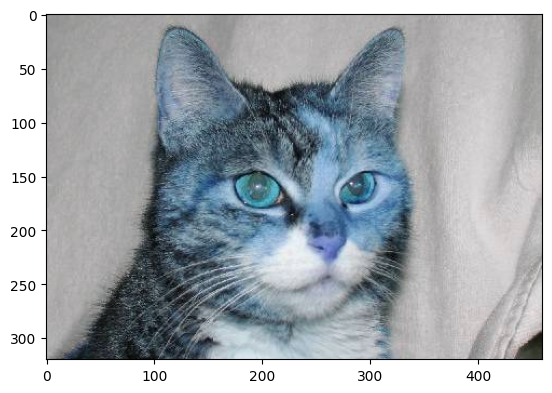

In [14]:
plt.imshow(test_img)

In [15]:
test_img = cv2.resize(test_img,(256,256))

In [16]:
test_input = test_img.reshape((1,256,256,3))

In [17]:
model.predict(test_input)

1/1 [==============================] - 1s 1s/step


array([[0.]], dtype=float32)

In [18]:
test_img2 = cv2.imread('/content/train/dogs/dog.10005.jpg')

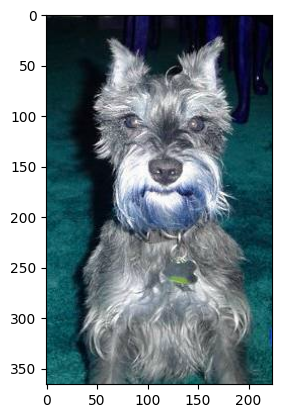

In [19]:
plt.imshow(test_img2)

In [20]:
test_img2.shape

(366, 224, 3)

In [21]:
test_img2 = cv2.resize(test_img2,(256,256))

In [22]:
test_input2 = test_img2.reshape((1,256,256,3))

In [23]:
model.predict(test_input2)

1/1 [==============================] - 0s 20ms/step


array([[1.]], dtype=float32)

In [24]:
test_img3 = cv2.imread('/content/train/cats/cat.10004.jpg')

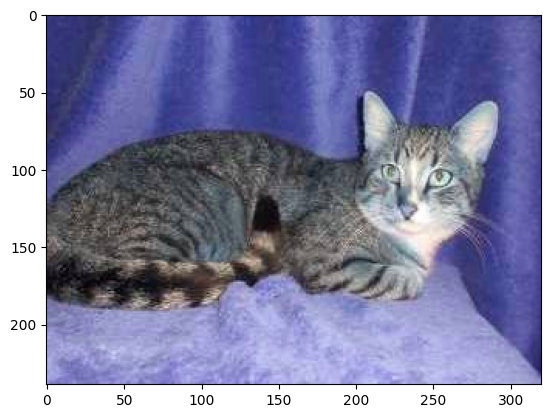

In [25]:
plt.imshow(test_img3)

In [26]:
test_img3 = cv2.resize(test_img3,(256,256))

In [27]:
test_input3 = test_img3.reshape((1,256,256,3))

In [28]:
model.predict(test_input3)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)

In [40]:
test_img4 = cv2.imread('/content/train/dogs/dog.10015.jpg')

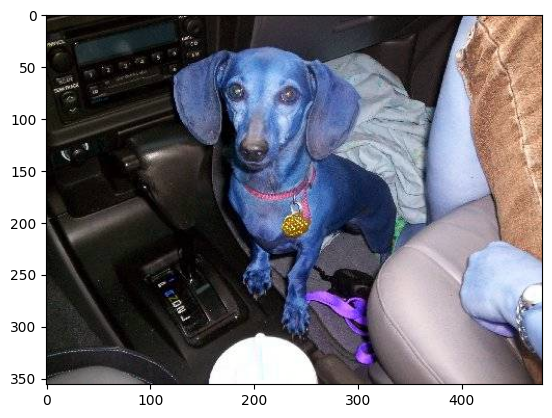

In [41]:
plt.imshow(test_img4)

In [42]:
test_img4 = cv2.resize(test_img4,(256,256))

In [43]:
test_input4 = test_img4.reshape((1,256,256,3))

In [44]:
model.predict(test_input4)

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)